In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# load the data
columns = ['time',
 'distance',
 'easting',
 'northing',
 'ellipsoid_height',
 'latitude',
 'longitude',
 'ellipsoid_height_1',
 'roll',
 'pitch',
 'heading',
 'east_velocity',
 'north_velocity',
 'up_velocity',
 'east_sd',
 'north_sd',
 'height_sd',
 'roll_sd',
 'pitch_sd',
 'heading_sd']

imu_df = pd.read_csv("../../Data/imu_data/export_Mission_2.txt", 
                     sep='[ ]+',
                     engine='python',
                     skiprows=28,
                     header=None,
                     names=columns)

In [4]:
# Import anchor pickle
anchors = pd.read_pickle("../../Data/pickles/anchors_161726.pkl")
anchors_df = pd.DataFrame(anchors,columns=['gps_time'])

In [6]:
def slice_imu(imu_df,lidar_df,imu_time_name = 'time',lidar_time_name='gps_time'):
    #Function slices imu_df for the points that fall within the GPS timeframe of the provided lidar_df.
    
    # Determine gps timeframe for lidar
    lidar_range = (lidar_df[lidar_time_name].min(),lidar_df[lidar_time_name].max())
    print("Timespan of LiDAR data: {:2.2f} seconds".format(lidar_range[1]-lidar_range[0]))
    
    # Slide of IMU data within lidar_range
    in_slice = (imu_df[imu_time_name]>=lidar_range[0]) & (imu_df[imu_time_name]<=lidar_range[1])
    imu_slice = imu_df[in_slice]
    print("IMU points in timespan: {:d}".format(imu_slice.shape[0]))
    return imu_slice

In [7]:
# Create IMU slice
imu_slice = slice_imu(imu_df,anchors_df)

Timespan of LiDAR data: 28.52 seconds
IMU points in timespan: 5704


In [8]:
imu_df.head()

,time,distance,easting,northing,ellipsoid_height,latitude,longitude,ellipsoid_height_1,roll,pitch,heading,east_velocity,north_velocity,up_velocity,east_sd,north_sd,height_sd,roll_sd,pitch_sd,heading_sd
0,576186.00101,0.000,563810.653,4496470.594,-22.876,40.616597,-74.245624,-22.876,-1.654,-7.485,255.379,-19.906,-4.809,0.650,0.085,0.069,0.105,0.02,0.019,0.047
1,576186.00601,0.102,563810.553,4496470.569,-22.873,40.616597,-74.245625,-22.873,-1.648,-7.486,255.379,-19.914,-4.810,0.663,0.085,0.069,0.105,0.02,0.019,0.047
2,576186.01101,17.758,563827.660,4496474.878,-23.427,40.616634,-74.245423,-23.427,-1.642,-7.490,255.379,-19.921,-4.810,0.673,0.085,0.069,0.105,0.02,0.019,0.047
3,576186.01601,17.861,563827.560,4496474.853,-23.424,40.616634,-74.245424,-23.424,-1.636,-7.496,255.379,-19.927,-4.810,0.676,0.085,0.069,0.105,0.02,0.019,0.047
4,576186.02101,17.963,563827.461,4496474.828,-23.421,40.616634,-74.245425,-23.421,-1.632,-7.502,255.378,-19.933,-4.809,0.679,0.085,0.069,0.105,0.02,0.019,0.047


In [14]:
%time
a = np.zeros(len(anchors_df))
for i,time in enumerate(imu_slice['time']):
    a = [time if time <= pt else a[i] for i,pt in enumerate(anchors_df['gps_time'])]
    if i%10 == 0:
        print("Iteration count: ",i)
    
anchors_df['imu_time'] = a

Iteration count:  0
Iteration count:  10
Iteration count:  20
Iteration count:  30
Iteration count:  40
Iteration count:  50
Iteration count:  60
Iteration count:  70
Iteration count:  80
Iteration count:  90
Iteration count:  100
Iteration count:  110
Iteration count:  120
Iteration count:  130
Iteration count:  140
Iteration count:  150
Iteration count:  160
Iteration count:  170
Iteration count:  180
Iteration count:  190
Iteration count:  200
Iteration count:  210
Iteration count:  220
Iteration count:  230
Iteration count:  240
Iteration count:  250
Iteration count:  260
Iteration count:  270
Iteration count:  280
Iteration count:  290
Iteration count:  300
Iteration count:  310
Iteration count:  320
Iteration count:  330
Iteration count:  340
Iteration count:  350
Iteration count:  360
Iteration count:  370
Iteration count:  380
Iteration count:  390
Iteration count:  400
Iteration count:  410
Iteration count:  420
Iteration count:  430
Iteration count:  440
Iteration count:  450

Iteration count:  3620
Iteration count:  3630
Iteration count:  3640
Iteration count:  3650
Iteration count:  3660
Iteration count:  3670
Iteration count:  3680
Iteration count:  3690
Iteration count:  3700
Iteration count:  3710
Iteration count:  3720
Iteration count:  3730
Iteration count:  3740
Iteration count:  3750
Iteration count:  3760
Iteration count:  3770
Iteration count:  3780
Iteration count:  3790
Iteration count:  3800
Iteration count:  3810
Iteration count:  3820
Iteration count:  3830
Iteration count:  3840
Iteration count:  3850
Iteration count:  3860
Iteration count:  3870
Iteration count:  3880
Iteration count:  3890
Iteration count:  3900
Iteration count:  3910
Iteration count:  3920
Iteration count:  3930
Iteration count:  3940
Iteration count:  3950
Iteration count:  3960
Iteration count:  3970
Iteration count:  3980
Iteration count:  3990
Iteration count:  4000
Iteration count:  4010
Iteration count:  4020
Iteration count:  4030
Iteration count:  4040
Iteration c

In [42]:
imu_slice[imu_slice['time']==a[1]]

,time,distance,easting,northing,ellipsoid_height,latitude,longitude,ellipsoid_height_1,roll,pitch,heading,east_velocity,north_velocity,up_velocity,east_sd,north_sd,height_sd,roll_sd,pitch_sd,heading_sd
172814,577050.08162,33526.355,583234.109,4498860.534,305.947,40.636396,-74.015711,305.947,0.355,-2.362,350.362,0.16,17.981,0.472,0.016,0.016,0.027,0.007,0.007,0.019


In [35]:
a[:5]

[577050.1866199999, 577050.08162, 577049.2166, 577049.0366, 577052.97665]

In [36]:
anchor_df.head()

,gps_time,imu_time
0,578618.338466,0.0
1,578614.851780,0.0
2,578616.178879,0.0
3,578617.289284,0.0
4,578617.874551,0.0


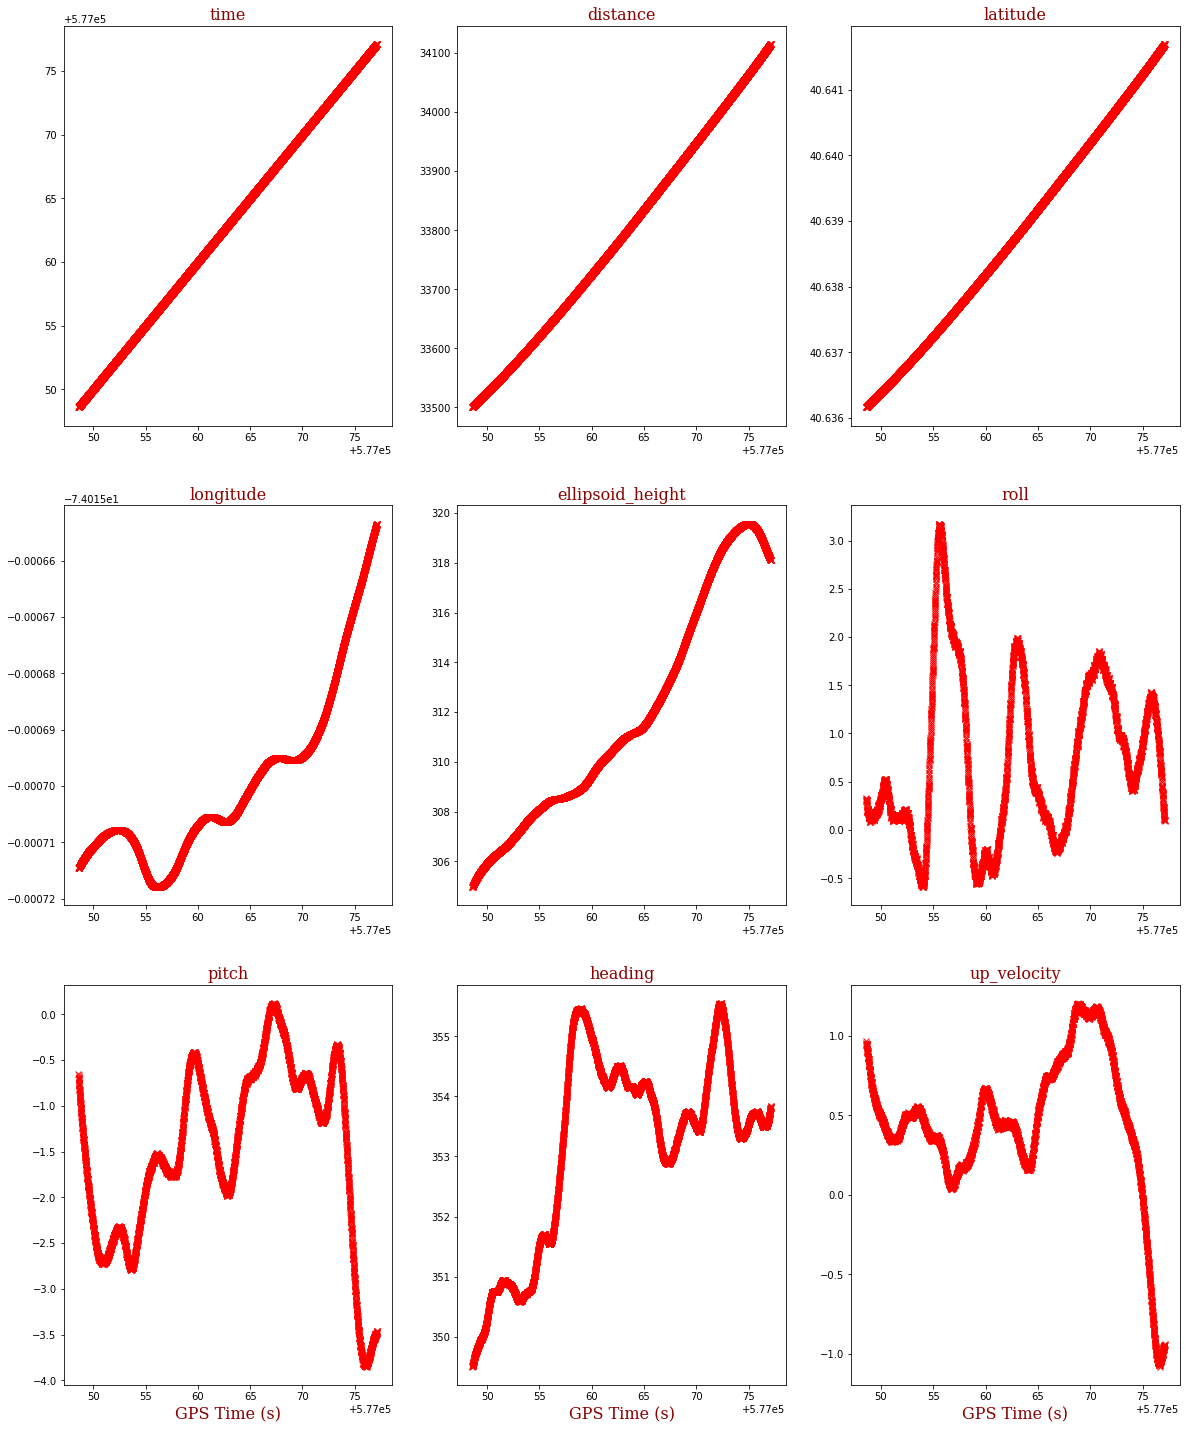

In [52]:
# Plot some IMU data
keys = ['time','distance','latitude','longitude','ellipsoid_height','roll','pitch','heading','up_velocity']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(20,25))
for i, key in enumerate(keys):
    plt.subplot(3,3, (i+1))
    plt.plot(imu_slice['time'],imu_slice[key],'xr')
    plt.title(str(key),fontdict=font)
    if i >= 6:
        plt.xlabel("GPS Time (s)",fontdict=font)

Text(0.5, 0, 'GPS Time')

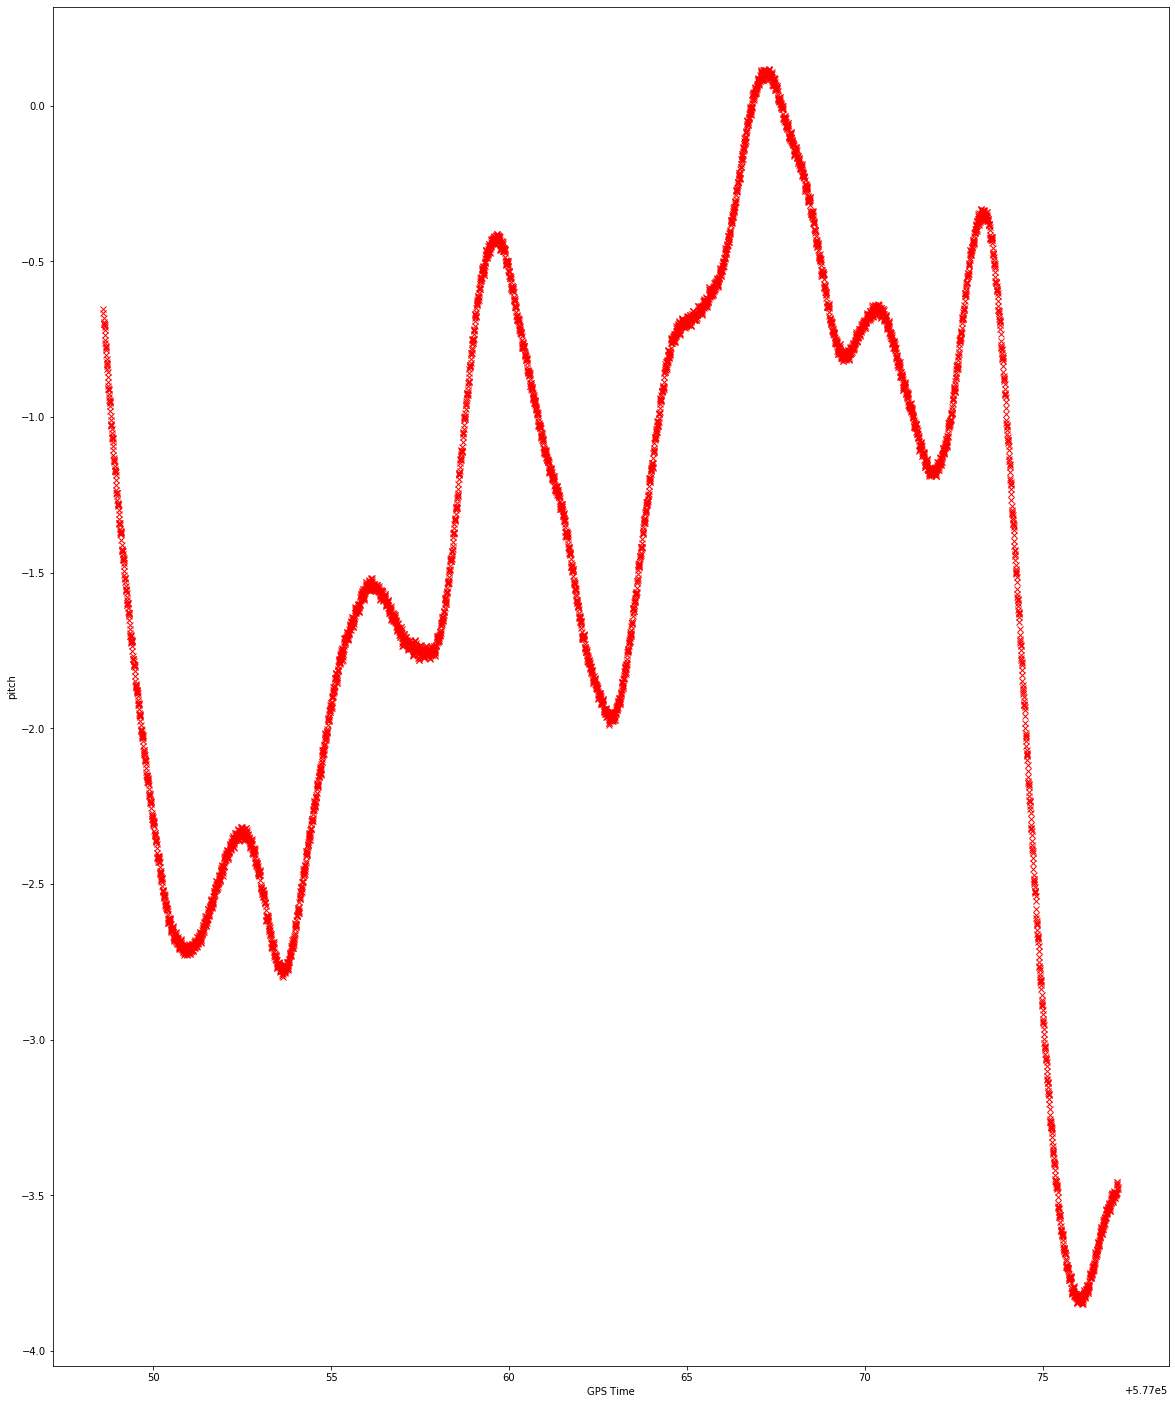

In [40]:
field = 'pitch'
plt.figure(figsize=(20,25))
plt.plot(imu_slice['time'],imu_slice[field],'xr')
plt.ylabel(field)
plt.xlabel("GPS Time")

In [53]:
imu_slice['time'].max()-imu_slice['time'].min()

28.515339999925345

In [56]:
anchors_range[0]-anchors_range[1]

-28.5199090000242

In [57]:
imu_slice.shape

(5704, 20)

In [58]:
5704/28.5

200.140350877193